# Notebook 3

## Derivadas (Parte 2)

#### Python 🐍

> Dr. Ricardo Méndez Fragoso $\mathbb{R} i \vec c \hbar$

Veamos la programación de la derivada desde el punto de vista funcional. Se utilizarán diferentes órdenes de aproximación para la derivada. Comencemos con importar las bibliotecas que utilizaremos

In [1]:
from pylab import *

Supongamos que tenemos una función con dominio $(x_0,x_1,x_2,...,x_N)$ e imagen $(f_0,f_1,f_2,...,f_N)$. De acuerdo con las notas, la derivada numérica asimétrica que desprecia los términos en $h^2$ en el desarrollo de Taylor es:

$$
f'(x_i) = \frac{f_{i+1} - f_i}{x_{i+1} - x_i}
$$

Para el último punto se tiene que el cálculo de la derivada es:

$$
f'(x_N) = - \frac{f_{N-1} - f_N}{x_{N-1} - x_N}
$$

La siguiente función implementa la derivada numérica y asimétrica que toma en cuenta el último punto.

In [2]:
def deriv_h2(f,x):
    f_prima = zeros(len(f))
    h = x[1] - x[0]
    for i in range(len(f)-1):
        f_prima[i] = ( f[i+1]-f[i] )/h
    # calcular el ultimo punto
    f_prima[-1] = - ( f[-2]-f[-1] )/h 
    return f_prima

A continuación probemos la función anterior y comparemos con la derivada analítica

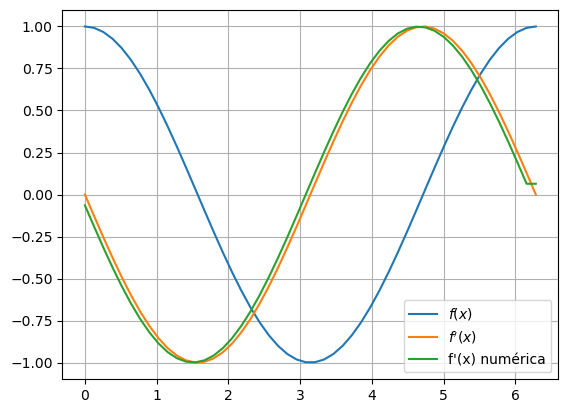

In [3]:
x = linspace(0,2*pi)
y = cos(x)
y_deriv = -sin(x)
y_num_deriv = deriv_h2(y,x)
figure(dpi=100)
plot(x,y,label="$f(x)$")
plot(x,y_deriv,label="$f'(x)$")
plot(x,y_num_deriv,label="f'(x) numérica")
legend(),grid()
show()

Este resultado ya lo habíamos encontrado en el notebook anterior, la diferencia es que ahora tenemos una función que toma en cuenta el último punto y la podemos utilizar todas las veces que sea necesario. Calculemos el tiempo que le tomaría a la función anterior realizar los cálculos con 50 puntos en el dominio.

In [4]:
%%timeit
deriv_h2(y,x)

25.6 µs ± 1.07 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


A continuación hacemos la programación de la derivada simétrica:

$$
f'(x_i) = \frac{f_{i+1} - f_{i-1}}{x_{i+1} - x_{i-1}}
$$

Para los puntos extremos las relaciones son:

$$
f'(x_0) = - \frac{f_{1} - f_0}{x_{1} - x_0}
$$

$$
f'(x_N) = - \frac{f_{N-1} - f_N}{x_{N-1} - x_N}
$$

La ventaja de esta forma de hacer el cálculo de la derivada es que se desprecian términos de orden $h^3$ y por lo tanto una mejor precisión.

In [5]:
def deriv_h3(f,x):
    f_prima = zeros(len(f))
    h = x[1] - x[0]
    dosh = 2*h
    for i in range(1,len(f)-1):
        f_prima[i] = ( f[i+1]-f[i-1] )/(dosh)
    # calcular el primer punto
    f_prima[0] = ( -0.5*f[2] + 2*f[1] -1.5*f[0] )/h
    # calcular el ultimo punto
    f_prima[-1] = -( -0.5*f[-3] + 2*f[-2] -1.5*f[-1] )/h    
    return f_prima

Tomemos el tiempo de esta función para compararla con la del caso anterior.

In [6]:
%%timeit
deriv_h3(y,x)

29.6 µs ± 314 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


Utilizando la función anterior, veamos las comparaciones de las gráficas de la derivada analítica y la numérica.

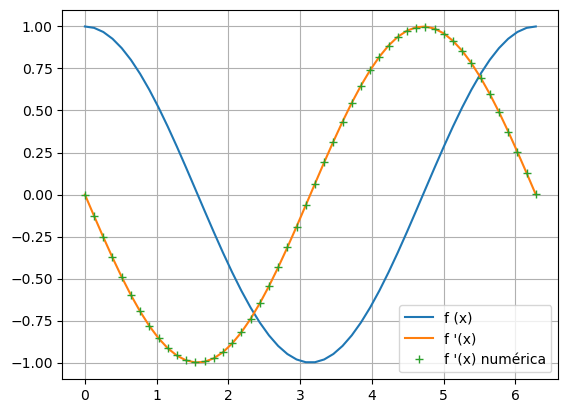

In [7]:
x = linspace(0,2*pi,50)
y = cos(x)
y_deriv = -sin(x)
figure(dpi=100)
y_num_deriv = deriv_h3(y,x)
plot(x,y,label="f (x)")
plot(x,y_deriv , label="f '(x)")
plot(x,y_num_deriv,'+',label="f '(x) numérica")
grid(),legend()
show()

Como se puede apreciar, el cálculo de la derivada con esta última función es mucho más precisa. Veamos la comparación entre las dos funciones anteriores que se programaron en las celdas de arriba. Adicionalmente, calculemos la aproximación con $h^2$ con 1000 puntos para ver si se obtiene la misma precisión que con la función que aproxima hasta $h^3$.

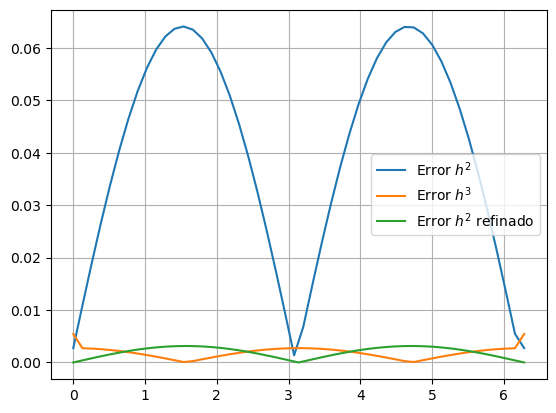

In [8]:
x = linspace(0,2*pi)
y = sin(x)
Dy = cos(x)
y_h2 = deriv_h2(y,x)
y_h3 = deriv_h3(y,x)
error_h2 = abs(y_h2 - Dy)
error_h3 = abs(y_h3 - Dy)

x_refinado = linspace(0,2*pi,1000)
y_refinado = sin(x_refinado)
Dy_refinado = cos(x_refinado)
y_h2_refinado = deriv_h2(y_refinado,x_refinado)
error_h2_refinado = abs(Dy_refinado-y_h2_refinado)

figure(dpi=100)
plot(x,error_h2,label="Error $h^2$")
plot(x,error_h3,label="Error $h^3$")
plot(x_refinado,error_h2_refinado,label="Error $h^2$ refinado")
grid(),legend()
show()

Como se puede observar, se necesitan 3 órdenes de magnitud en los puntos de la función para alcanzar la misma precisión que la función `deriv_h3()`. Esta desventaja se ve reflejada en el tiempo de ejecución de `deriv_h2()` con 1000 puntos:

In [9]:
%%timeit
deriv_h2(y_refinado,x_refinado)

475 µs ± 13.8 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


En las notas de clase viene la forma de derivar una expresión de la derivada de $f(x)$ donde se desprecian términos de orden $h^5$ en adelante. Esto implica tener que hacer operaciones con dos puntos a la izquierda y dos a la derecha para una expresión simétrica. Esta expresión es:

$$
f'(x_i) = \frac{1}{12h}\left( -f_{i+2} + 8f_{i+1} -8f_{i-1} + f_{i-2} \right)
$$

Los puntos extremos se calculan de manera asimétrica con la siguiente expresión:

$$
f'(x_i) = \frac{1}{h} \left( -\frac{25}{12} f_i + 4 f_{i+1} -3f_{i+2} +\frac{4}{3}f_{i+3} -\frac{1}{4}f_{i+4} \right)
$$

En la siguiente celda se hace la programación de este algoritmo.

In [10]:
def deriv_h5(f,x):
    f_prima = zeros(len(f))
    h = x[1] - x[0]
    doceh = 12*h
    for i in range(2,len(f)-2):
        f_prima[i] = ( -f[i+2]+ 8*(f[i+1]-f[i-1]) +f[i-2] )/(doceh)
    c0,c1,c2,c3,c4 = -25/12,4,-3,4/3,-0.25
    # calcular el primer punto
    f_prima[0] = ( c0*f[0] + c1*f[1] + c2*f[2] + c3*f[3] + c4*f[4] )/h
    # calcular el segundo punto
    f_prima[1] = ( c0*f[1] + c1*f[2] + c2*f[3] + c3*f[4] + c4*f[5] )/h
    # calcular el ultimo punto o el punto N
    f_prima[-1] = -( c0*f[-1] + c1*f[-2] + c2*f[-3] + c3*f[-4] + c4*f[-5] )/h
    # calcular el penultimo punto o el N-1
    f_prima[-2] = -( c0*f[-2] + c1*f[-3] + c2*f[-4] + c3*f[-5] + c4*f[-6] )/h
    return f_prima

Veamos como se comporta esta última función en el cálculo de la derivada con los mismos 50 puntos que se utilizan con la derivada simétrica en las celdas anteriores.

In [11]:
%%timeit
deriv_h5(y,x)

65.8 µs ± 193 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


Si bien el tiempo de ejecución es el doble, veamos que sucede con la precisión en el cálculo 

In [12]:
y_h3 = deriv_h3(y,x)
y_h5 = deriv_h5(y,x)
print("Error con h3 =" , max(abs(Dy-y_h3)) )
print("Error con h5 =" , max(abs(Dy-y_h5)) )

Error con h3 = 0.005449343039424237
Error con h5 = 5.270335988705188e-05


En este caso, a pesar de que el cálculo se ha hecho en el doble de tiempo para `deriv_h5()`, vemos que la precisión que hemos ganado es de dos órdenes de magnitud. 

[Regresar a la página del curso.](http://sistemas.fciencias.unam.mx/~rich/FisComp/)

Se agradece el apoyo del proyecto DGAPA-PAPIME:

+ PE 103021 nueva versión durante el año 2022. Versión interactiva en Colab.
+ PE 112919 durante el año 2020. Idea original.